# Marketing Campaign Data Analysis Case

**Problem**
The case study involves enhancing the effectiveness of marketing campaigns for a leading food delivery app by using data analytics to identify key customer segments, understand campaign response characteristics, and build a predictive model to improve campaign profitability. Despite its large user base, the company's recent campaign showed a negative return on investment, with a cost of 6,720 MU and revenue of 3,674 MU, resulting in a loss of 3,046 MU and a low 15% success rate. The goal is to apply advanced data analysis to target customers better for future campaigns, minimizing costs and maximizing revenue by selecting the customers most likely to respond positively to marketing efforts.

**Objectives**
The objectives for this analysis are:
1. Data Exploration: Analyze customer and campaign data to identify characteristics linked to positive responses, clarifying behavior patterns for informed marketing decisions.
2. Customer Segmentation: Propose a segmentation strategy to customize marketing approaches based on specific customer needs and preferences.
3. Predictive Modeling: Create a model to forecast customer responses to optimize campaign profitability by identifying potential buyers.
4. Business Presentation: Present findings and strategy recommendations to stakeholders to support data-driven decision-making in the marketing team.

# Step 1: Setting up the environment and loading the data

In [37]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the main dataset
df = pd.read_csv('https://raw.githubusercontent.com/faiyazmn/Marketing_Campaign_Optimization/refs/heads/main/ml_project1_data.csv')


# Step 2: Exploratory Data Analysis (EDA)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
count = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([count, percent], axis=1, keys=['count', 'percent'])
missing_df[count>0]

,count,percent
Income,24,1.071429


Income has missing values.

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Convert 'Year_Birth' to datetime and extract the year
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y', errors='coerce').dt.year

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d', errors='coerce')

In [9]:
# Create Customer Age Column
df['Age'] = date.today().year - df['Year_Birth']

# Calculate the number of days as a customer
df['Days_as_Customer'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,4446
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,3896
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,4095
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,3922
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,3944


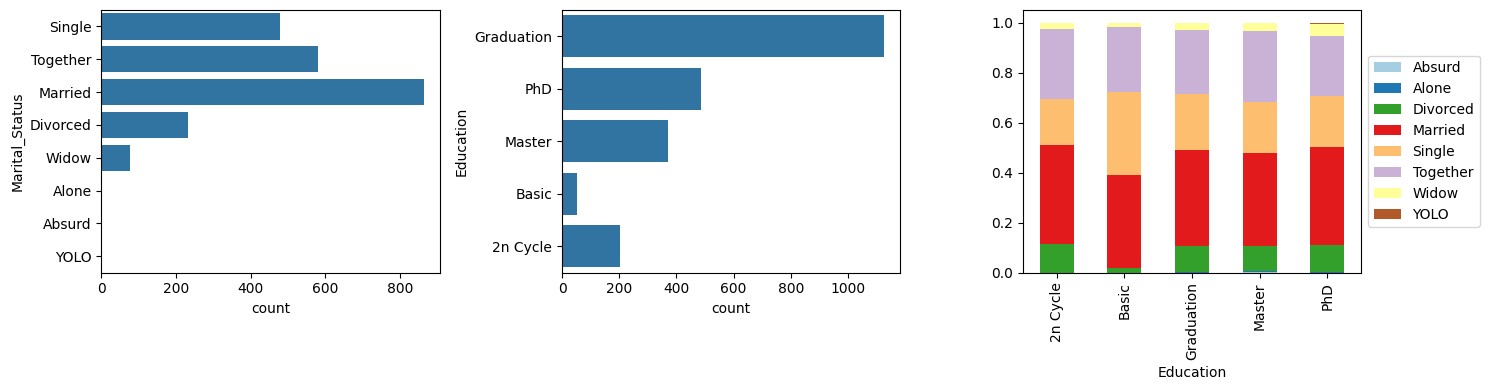

In [11]:
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(df['Marital_Status'], ax=ax[0])
sns.countplot(df['Education'], ax=ax[1])
df_plot = df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

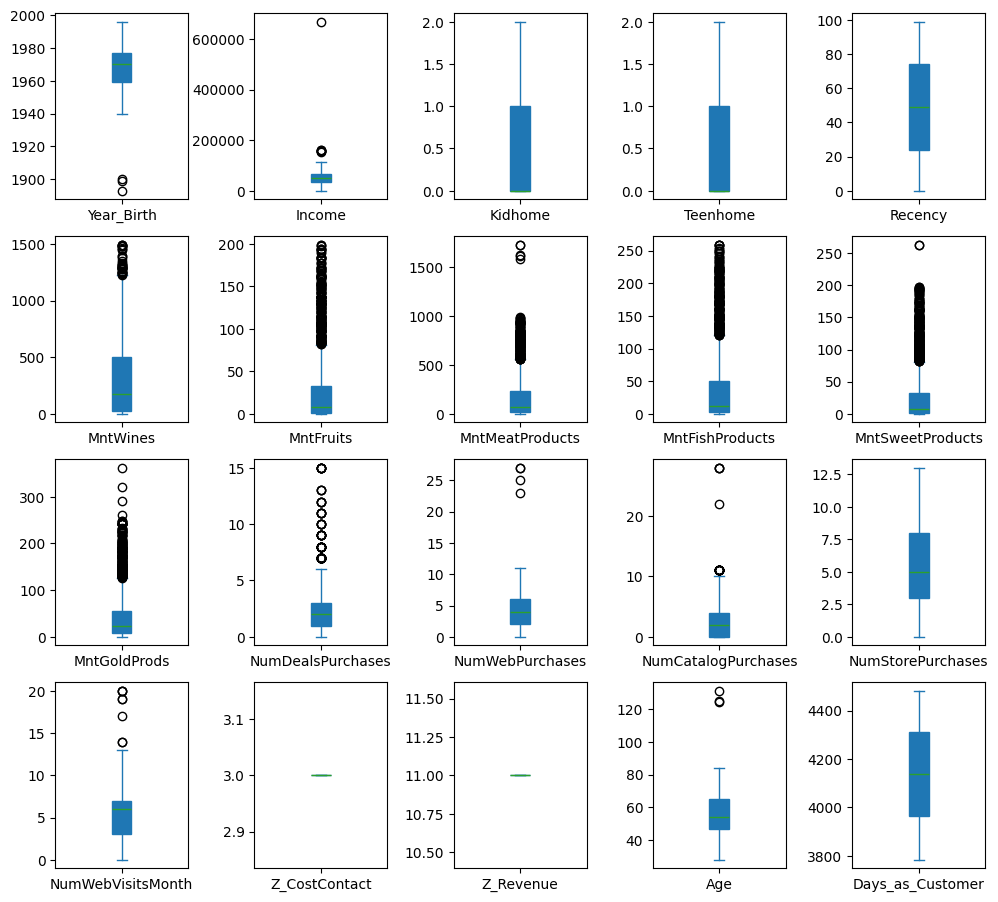

In [12]:
#Checking outliers
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
df_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

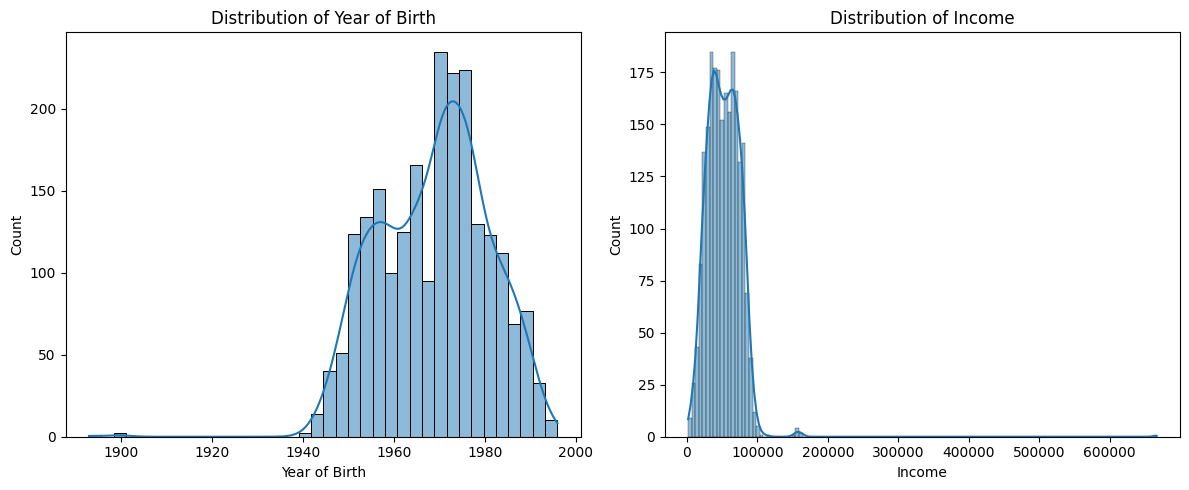

In [13]:
# Set up the figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram for 'Year_Birth' with KDE
sns.histplot(data=df, x='Year_Birth', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Year of Birth')
axes[0].set_xlabel('Year of Birth')

# Plot histogram for 'Income' with KDE
sns.histplot(data=df, x='Income', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Income')
axes[1].set_xlabel('Income')

# Display the plots
plt.tight_layout()
plt.show()


In [14]:
df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,3,11,0,124,4059
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,3,11,0,131,3826
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,3,11,0,125,4059


In [15]:
df[df['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,47,4175


**Findings**:
About 1% of customers have missing values in the Income field.
There is one customer with an exceptionally high income, which may be an outlier.
Three customers have a Year_Birth value indicating an age of 120 years or older (born in or before 1900).

In [16]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)
df = df.dropna().reset_index(drop=True)

In [17]:
df = df.drop(df[df['Income'] > 200000].index)

In [18]:
print(df.head())
print(df.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0        

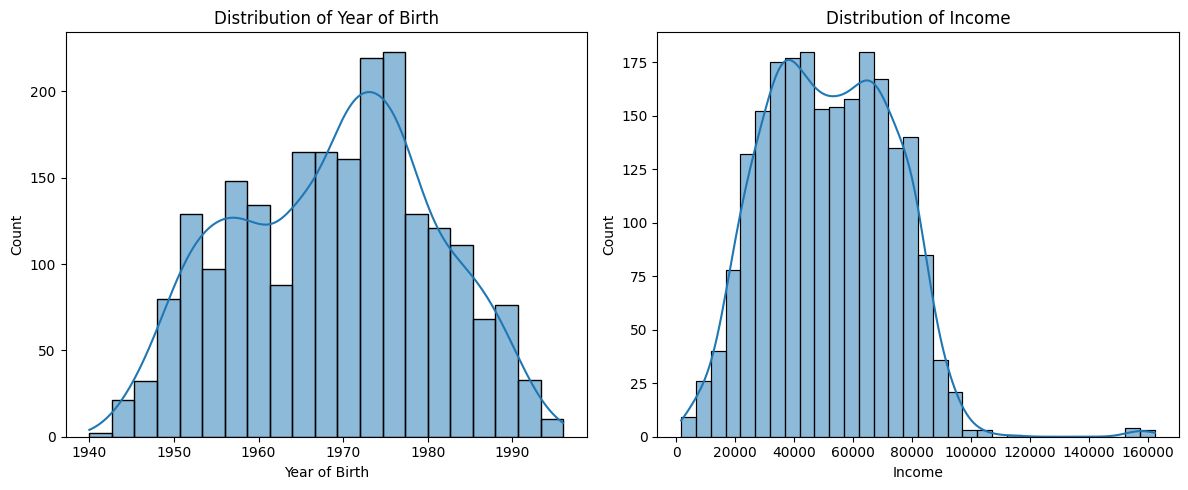

In [19]:
# Recheck the distribution of 'Year_Birth' and 'Income' after data cleaning
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the distribution for 'Year_Birth'
sns.histplot(data=df, x='Year_Birth', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Year of Birth')
axes[0].set_xlabel('Year of Birth')

# Plot the distribution for 'Income'
sns.histplot(data=df, x='Income', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Income')
axes[1].set_xlabel('Income')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Step 3: Pre-processing

In [20]:
# Defining Age Groups
df['Age_group'] = pd.cut(
    df['Year_Birth'],
    bins=[1939, 1964, 1979, 1994, 2012],
    labels=['BabyBoomers', 'GenX', 'Millennials', 'GenZ'],
    right=False
)

In [21]:
#Standardize Marital Status Categories
# Group 'Alone', 'Absurd', and 'YOLO' under 'Single'
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

#Create Dummy Variables for Marital Status
marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='marital')
df = pd.concat([df, marital_dummies], axis=1)


In [22]:
#Convert Education Levels to Ordinal Categories
# Replacing 'Education' with ordinal values
education_mapping = {'Basic': 0, 'Graduation': 1, '2n Cycle': 2, 'Master': 3, 'PhD': 4}
df['Education_Level'] = df['Education'].map(education_mapping)

# Display the transformed DataFrame
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Days_as_Customer,Age_group,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,Education_Level
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,67,4446,BabyBoomers,False,False,True,False,False,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,70,3896,BabyBoomers,False,False,True,False,False,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,59,4095,GenX,False,False,False,True,False,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,40,3922,Millennials,False,False,False,True,False,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,43,3944,Millennials,False,True,False,False,False,4


In [23]:
# Calculate Dependents and Child Presence
df['Dependents'] = df['Kidhome'] + df['Teenhome']
df['Has_child'] = np.where(df['Dependents'] > 0, 'Yes', 'No')

In [24]:
# Define Income Segments based on Percentiles
df['Income_Segment'] = pd.qcut(
    df['Income'],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [25]:
# Calculate Total Amount Spent (Sum of 'Mnt' Columns)
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Calculate Total Purchases (Sum of 'Purchases' Columns)
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Calculate Total Campaigns Accepted (Sum of 'Cmp' and 'Response' Columns)
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

In [26]:
df[['Age', 'Dependents', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].describe()

,Age,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,55.086347,0.947559,607.268083,14.891501,0.448915
std,11.701599,0.749466,602.513364,7.671629,0.893017
min,28.000000,0.000000,5.000000,0.000000,0.000000
25%,47.000000,0.000000,69.000000,8.000000,0.000000
50%,54.000000,1.000000,397.000000,15.000000,0.000000
75%,65.000000,1.000000,1048.000000,21.000000,1.000000
max,84.000000,3.000000,2525.000000,44.000000,5.000000


In [27]:
# Unique values for new categorical columns
unique_values = {col: df[col].unique() for col in ['Age_group', 'Education_Level', 'Marital_Status', 'Has_child', 'Income_Segment']}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"{col}: {values}")


Age_group: ['BabyBoomers', 'GenX', 'Millennials', 'GenZ']
Categories (4, object): ['BabyBoomers' < 'GenX' < 'Millennials' < 'GenZ']
Education_Level: [1 4 3 0 2]
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow']
Has_child: ['No' 'Yes']
Income_Segment: ['High', 'Medium', 'Very High', 'Low']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


In [28]:
# Transform product spending data into a long format
df_product = pd.melt(df[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']], id_vars=['ID'], var_name='Product', value_name='Spending')
df_product['Product'] = df_product['Product'].replace({
                                                'MntWines': 'Wine',
                                                'MntFruits': 'Fruit',
                                                'MntMeatProducts': 'Meat',
                                                'MntFishProducts': 'Fish',
                                                'MntSweetProducts': 'Sweet',
                                                'MntGoldProds': 'Gold'
                                                })

In [29]:
# Transform channel purchase data into a long format
df_channel = pd.melt(df[['ID','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']], id_vars=['ID'], var_name='Channel', value_name='Purchases')
df_channel['Channel'] = df_channel['Channel'].replace({
                                                'NumDealsPurchases': 'Deals',
                                                'NumWebPurchases': 'Web',
                                                'NumCatalogPurchases': 'Catalog',
                                                'NumStorePurchases': 'Store'
                                                })


In [30]:
# Transform campaign acceptance data into a long format
df_campaign = pd.melt(df[['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']], id_vars=['ID'], var_name='Campaign', value_name='Accepted')
df_campaign['Campaign'] = df_campaign['Campaign'].replace({
                                                'AcceptedCmp1': 'Cmp1',
                                                'AcceptedCmp2': 'Cmp2',
                                                'AcceptedCmp3': 'Cmp3',
                                                'AcceptedCmp4': 'Cmp4',
                                                'AcceptedCmp5': 'Cmp5',
                                                'Response': 'Cmp6'
                                                })

In [31]:
print(df_product.head(5))
print(df_channel.head(5))
print(df_campaign.head(5))

     ID Product  Spending
0  5524    Wine       635
1  2174    Wine        11
2  4141    Wine       426
3  6182    Wine        11
4  5324    Wine       173
     ID Channel  Purchases
0  5524   Deals          3
1  2174   Deals          2
2  4141   Deals          1
3  6182   Deals          2
4  5324   Deals          5
     ID Campaign  Accepted
0  5524     Cmp1         0
1  2174     Cmp1         0
2  4141     Cmp1         0
3  6182     Cmp1         0
4  5324     Cmp1         0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2212
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int32         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-null   i

In [33]:
# Drop unused columns
df = df.drop(columns=['Year_Birth', 'Education'])

# Step 4: Feature Engineering

**Correlation Analysis**

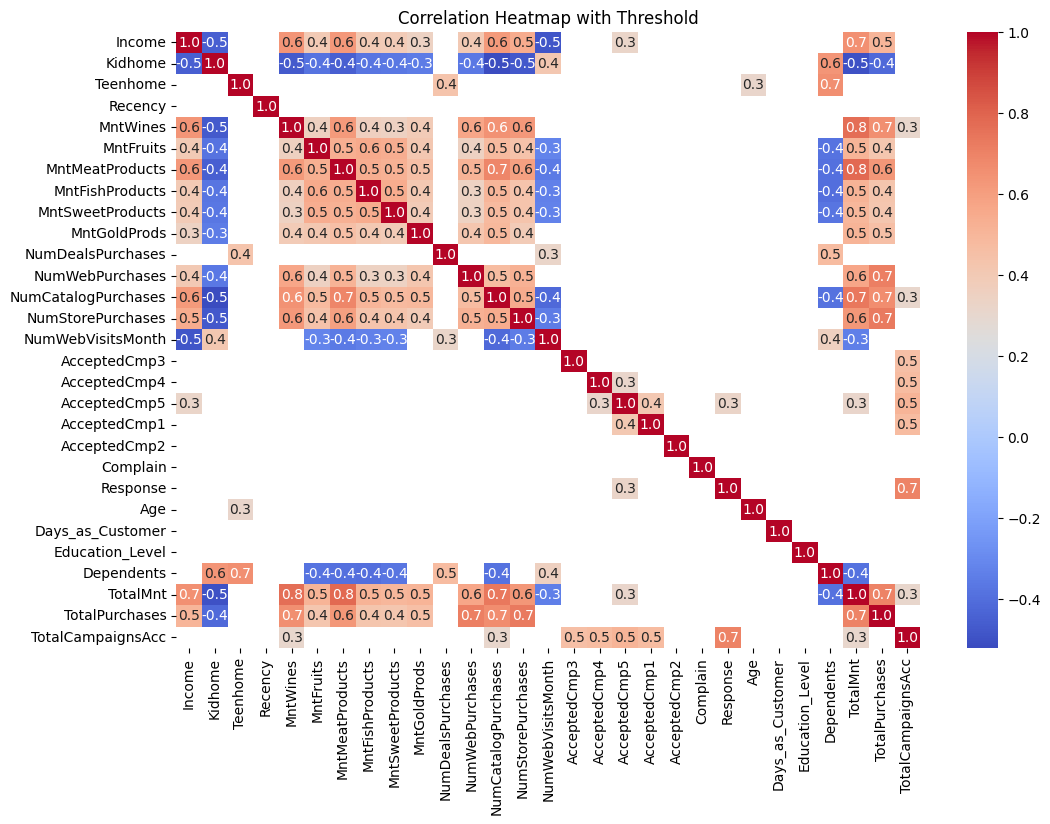

In [34]:
# Correlation Heatmap
# Filter correlations below the threshold = 0.3
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.drop(columns=['ID','Z_CostContact', 'Z_Revenue']).corr(method='kendall')
threshold = 0.3
mask = np.abs(correlation_matrix) >= threshold

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f", mask=~mask)
plt.title("Correlation Heatmap with Threshold")
plt.show()

**Findings:**
High-Income People

1. Spend more and make more purchases overall.
2. Visit the company’s website less frequently.
3. Make fewer purchases with discounts.

People with Kids at Home
1. Spend less and make fewer purchases overall.
2. Make a higher number of purchases with discounts.

People with High Average Order Volume
1. Buy more wines and meat products.
2. Make more purchases using a catalog.
3. Visit the company’s website less frequently.

**Segmentation of Customers**

In [45]:
# Drop unnecessary columns, including 'Dt_Customer' (assuming it is the datetime column)
df_clustering = df.drop(['Z_CostContact', 'Z_Revenue', 'Response', 'ID', 'Dt_Customer'], axis=1)

# Convert categorical variables to dummy/one-hot encoded variables
df_clustering = pd.get_dummies(df_clustering, drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)




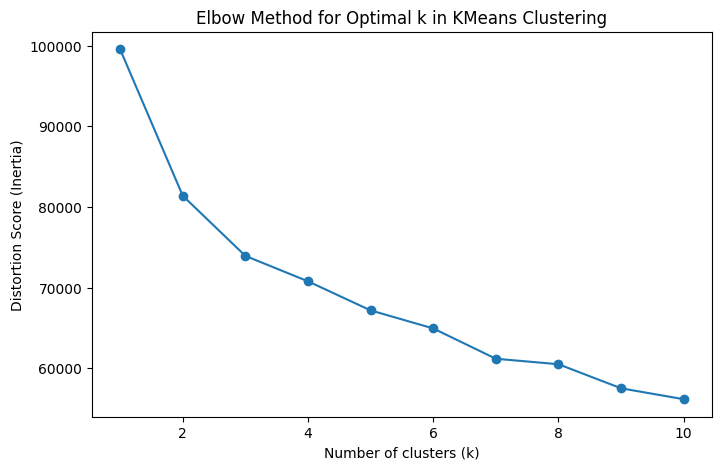

In [46]:
# Define the range of k values to test
k_values = range(1, 11)

# Initialize an empty list to store the distortion scores for each k
distortion_scores = []

# Loop over the range of k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)  # Fit KMeans model to the scaled data
    distortion_scores.append(kmeans.inertia_)  # Append the inertia (distortion) to the list

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortion_scores, marker='o')
plt.title('Elbow Method for Optimal k in KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion Score (Inertia)')
plt.show()


In [47]:
# Proceed with clustering

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Display the number of observations in each cluster
print(df['cluster'].value_counts())

cluster
0    1072
2     612
1     528
Name: count, dtype: int64


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2212
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Marital_Status       2212 non-null   object        
 2   Income               2212 non-null   float64       
 3   Kidhome              2212 non-null   int64         
 4   Teenhome             2212 non-null   int64         
 5   Dt_Customer          2212 non-null   datetime64[ns]
 6   Recency              2212 non-null   int64         
 7   MntWines             2212 non-null   int64         
 8   MntFruits            2212 non-null   int64         
 9   MntMeatProducts      2212 non-null   int64         
 10  MntFishProducts      2212 non-null   int64         
 11  MntSweetProducts     2212 non-null   int64         
 12  MntGoldProds         2212 non-null   int64         
 13  NumDealsPurchases    2212 non-null   i

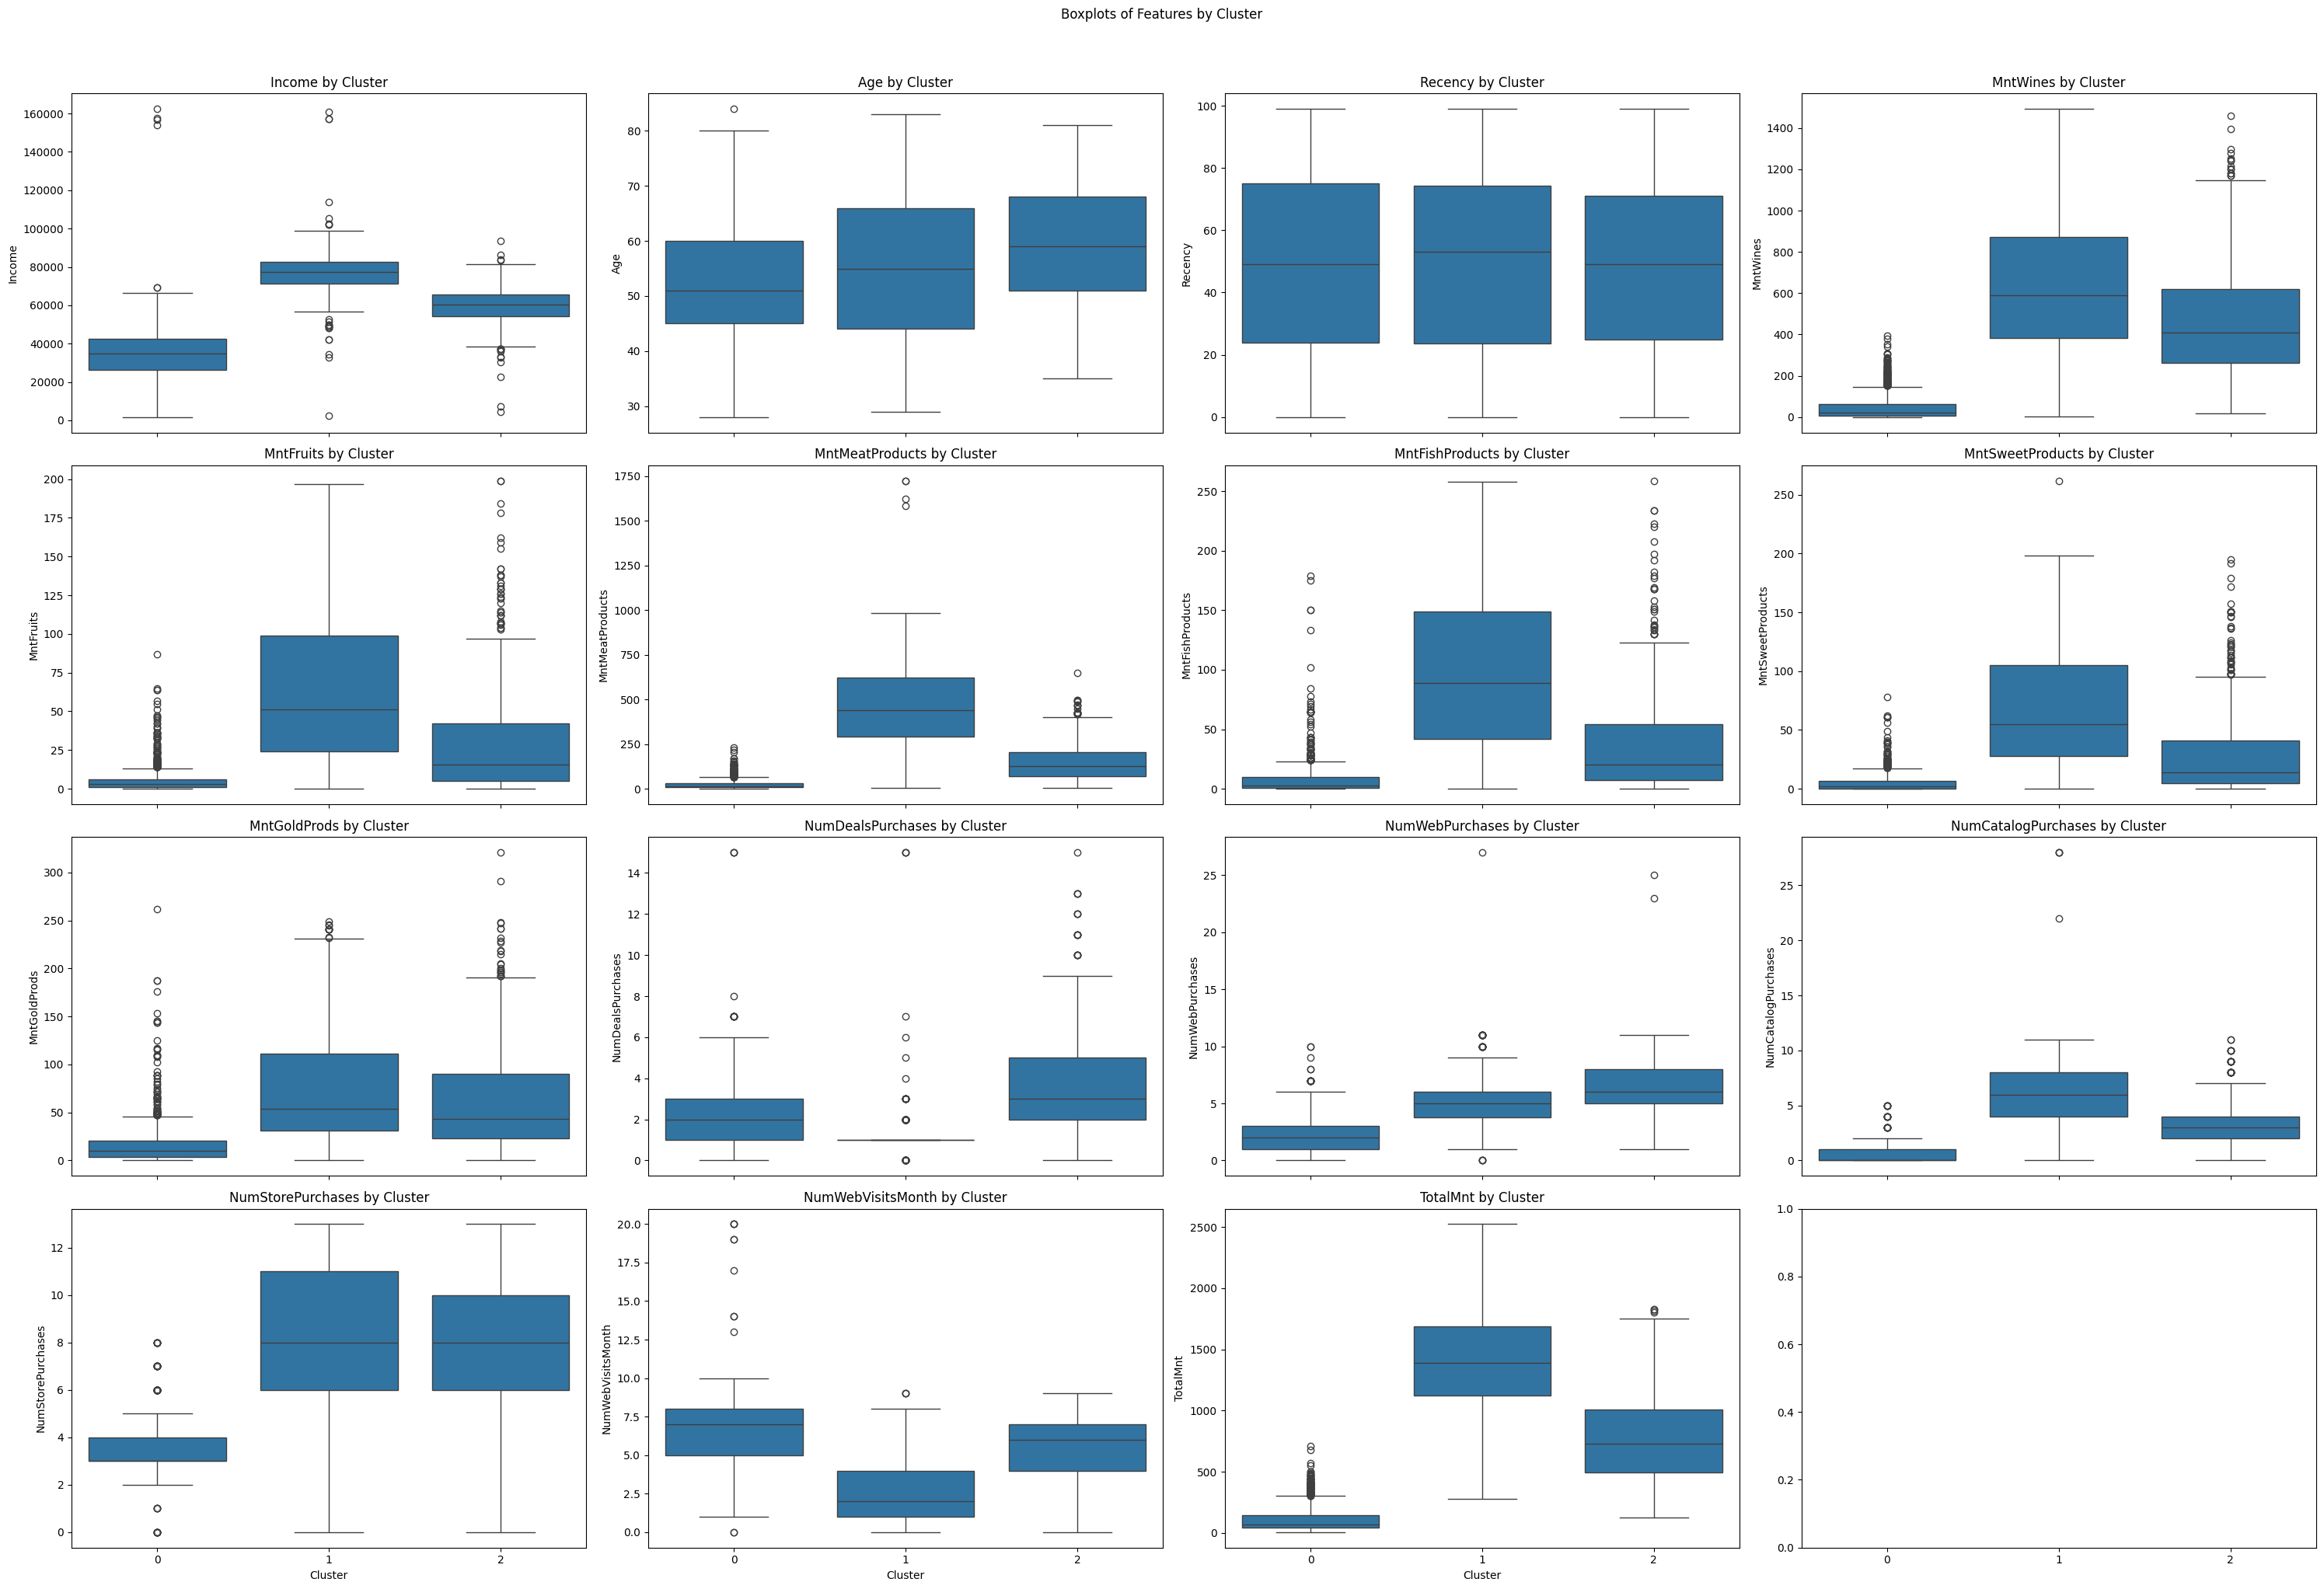

In [53]:
# Set up the figure with subplots
fig, axes = plt.subplots(4, 4, sharex=True, sharey=False, figsize=(30, 20))
fig.suptitle('Boxplots of Features by Cluster', y=1.02)

# List of features to plot
features = [
    'Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'TotalMnt'
]

# Loop through each feature and subplot
for i, feature in enumerate(features):
    row, col = divmod(i, 4)  # Calculate row and column index
    sns.boxplot(data=df_clustering, x='cluster', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Cluster')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()


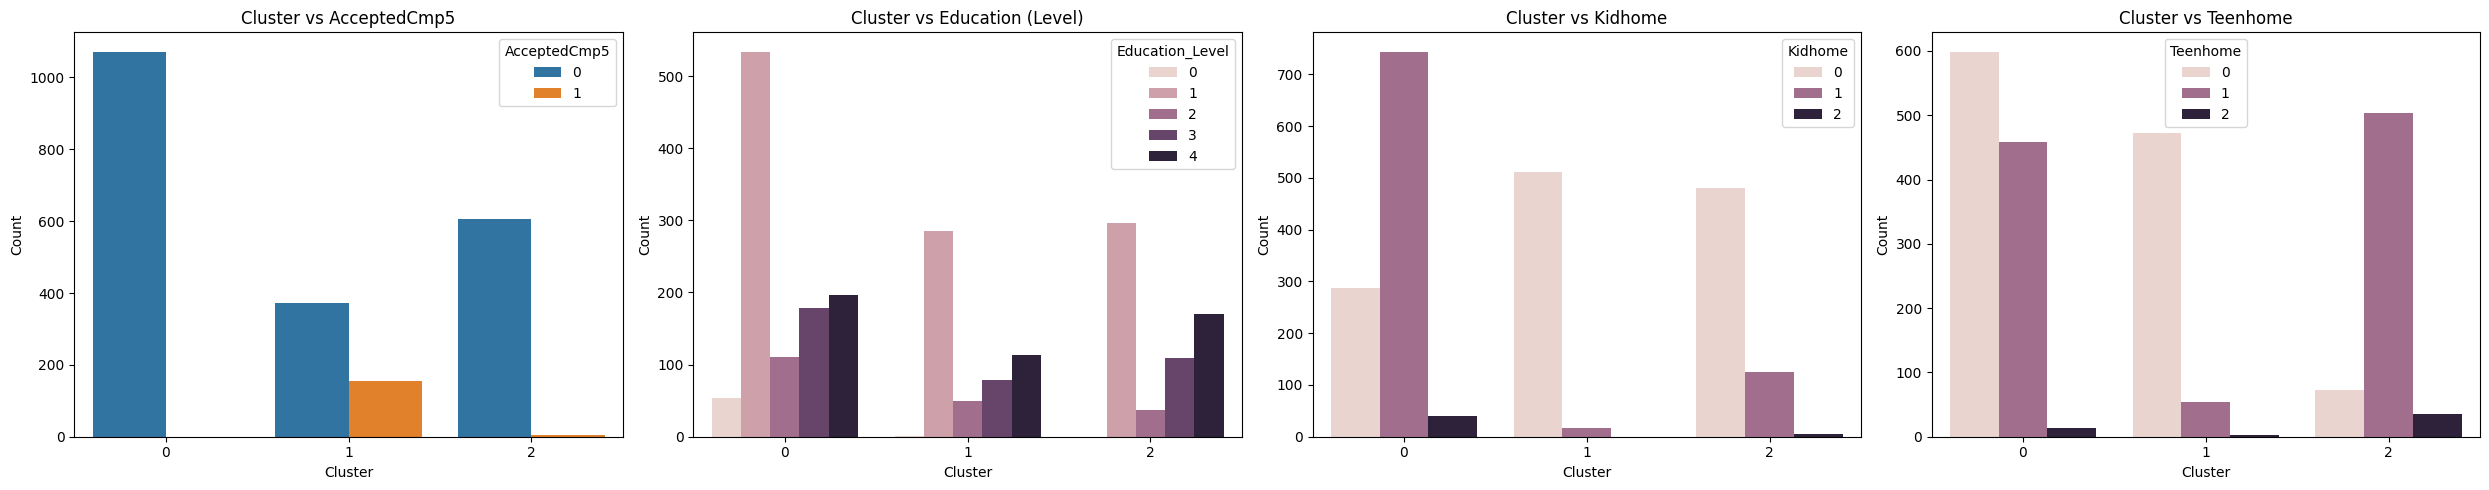

In [55]:
# Set up the figure with 1 row and 4 columns for subplots
fig, ax = plt.subplots(1, 4, figsize=(25, 5))

# Create a countplot for each categorical variable, segmented by cluster
sns.countplot(x="cluster", hue="AcceptedCmp5", data=df, ax=ax[0])
ax[0].set_title("Cluster vs AcceptedCmp5")
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Count")

sns.countplot(x="cluster", hue="Education_Level", data=df, ax=ax[1])
ax[1].set_title("Cluster vs Education (Level)")
ax[1].set_xlabel("Cluster")
ax[1].set_ylabel("Count")

sns.countplot(x="cluster", hue="Kidhome", data=df, ax=ax[2])
ax[2].set_title("Cluster vs Kidhome")
ax[2].set_xlabel("Cluster")
ax[2].set_ylabel("Count")

sns.countplot(x="cluster", hue="Teenhome", data=df, ax=ax[3])
ax[3].set_title("Cluster vs Teenhome")
ax[3].set_xlabel("Cluster")
ax[3].set_ylabel("Count")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Predictions**